# 주요 질병 사망자 및 보건 환경 비교 분석  
(Comparative Analysis of Major Disease Deaths and Health Environment)
## 1. 소개
국가별 의료 관련 데이터들을 이용해, 국가별, 연간 질병 사망자 수와 의료 인프라 간의 관계를 분석해보고 시각화를 해본 프로젝트

## 2. 목표
- 각 데이터의 EDA와 시각화
- 비슷한 분류의 데이터를 하나로 합치기
- 의료 인프라와 질병 사망자 수 관계 찾기 및 분석

## 3. 데이터 셋
- [KOSIS 10만명당 주요사망원인별 사망률](https://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_2KAAC13&vw_cd=MT_RTITLE&list_id=101_003_E&seqNo=&lang_mode=ko&language=kor&obj_var_id=&itm_id=&conn_path=MT_RTITLE)
- [KOSIS 의료종사자수](https://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_2KAAC13&vw_cd=MT_RTITLE&list_id=101_003_E&seqNo=&lang_mode=ko&language=kor&obj_var_id=&itm_id=&conn_path=MT_RTITLE)
- [KOSIS 보건관련 지출비](https://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_2KAAC13&vw_cd=MT_RTITLE&list_id=101_003_E&seqNo=&lang_mode=ko&language=kor&obj_var_id=&itm_id=&conn_path=MT_RTITLE)
- [KOSIS 보건서비스 지출비](https://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_2KAAC13&vw_cd=MT_RTITLE&list_id=101_003_E&seqNo=&lang_mode=ko&language=kor&obj_var_id=&itm_id=&conn_path=MT_RTITLE)
- [KOSIS 의약품 판매](https://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_2KAAC13&vw_cd=MT_RTITLE&list_id=101_003_E&seqNo=&lang_mode=ko&language=kor&obj_var_id=&itm_id=&conn_path=MT_RTITLE)
- [KOSIS 의약품 소비](https://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_2KAAC13&vw_cd=MT_RTITLE&list_id=101_003_E&seqNo=&lang_mode=ko&language=kor&obj_var_id=&itm_id=&conn_path=MT_RTITLE)
- [KOSIS 공공사회복지 지출](https://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_2KAAC13&vw_cd=MT_RTITLE&list_id=101_003_E&seqNo=&lang_mode=ko&language=kor&obj_var_id=&itm_id=&conn_path=MT_RTITLE)

## 4. 구현

#### 라이브러리

In [5]:
import glob
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import folium

#### 한글 폰트 설정

In [4]:
from IPython.display import set_matplotlib_formats

def get_font_family():
    import platform
    system_name = platform.system()

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        !apt-get install fonts-nanum -qq  > /dev/null
        !fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont
        
        font_family = "NanumBarunGothic"
    return font_family

get_font_family()

plt.style.use("ggplot")

font_family = get_font_family()
plt.rc("font", family=font_family)
plt.rc("axes", unicode_minus=False)

set_matplotlib_formats("retina")

C:\Users\spec3\AppData\Local\Temp/ipykernel_26448/2328754805.py:32: DeprecationWarning:

`set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`



In [78]:
# 모든 데이터 공통 국가
country_intersection = ['룩셈부르크',  '네덜란드',  '영국',  '이탈리아',  '캐나다',  '오스트레일리아',  '한국',  '일본',  '스페인',  '헝가리',  '독일',  '에스토니아',  '그리스',  '슬로바키아',  '핀란드',  '벨기에',  '체코',  '슬로베니아',  '프랑스',  '스웨덴',  '노르웨이',  '뉴질랜드',  '라트비아',  '덴마크',  '오스트리아',  '포르투갈',  '아일랜드',  '아이슬란드']

### 1. 주요 사망 원인별 사망률

### 2. 의료 종사자 수

#### Data Load

In [6]:
glob.glob("data/*")

['data\\의료종사자수.csv']

In [73]:
# Number of medical workers
df_Nmw = pd.read_csv("data/의료종사자수.csv", encoding="cp949")
df_Nmw.shape

(5820, 4)

In [28]:
df_Nmw.sample(5)

,국가별,시점,항목,데이터
2188,체코,2014,치과의사,7906.0
1690,유럽,2017,간호사,NaN
3680,리투아니아,2008,치과의사,2206.0
2738,프랑스,2018,의사,210567.0
1008,캐나다,2006,의사,67886.0


#### 전처리 및 초기 분석

##### 기본 정보 확인

In [29]:
df_Nmw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5820 entries, 0 to 5819
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   국가별     5820 non-null   object 
 1   시점      5820 non-null   int64  
 2   항목      5820 non-null   object 
 3   데이터     4900 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 182.0+ KB


4개의 컬럼을 가지고 있습니다.  
`국가별`은 `국가`로, `시점`은 `연도` / 타입은 `uint16`, `항목`은 `직업`으로, `데이터`는 `수`로 변경해줍니다.

In [74]:
col = ["국가", "연도", "직업", "수"]
df_Nmw.columns = col
df_Nmw["연도"] = df_Nmw["연도"].astype("uint16").copy()

In [60]:
df_Nmw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5820 entries, 0 to 5819
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   국가      5820 non-null   object 
 1   연도      5820 non-null   uint16 
 2   직업      5820 non-null   object 
 3   수       4900 non-null   float64
dtypes: float64(1), object(2), uint16(1)
memory usage: 147.9+ KB


##### 결측치

In [61]:
df_Nmw.isnull().sum()

국가      0
연도      0
직업      0
수     920
dtype: int64

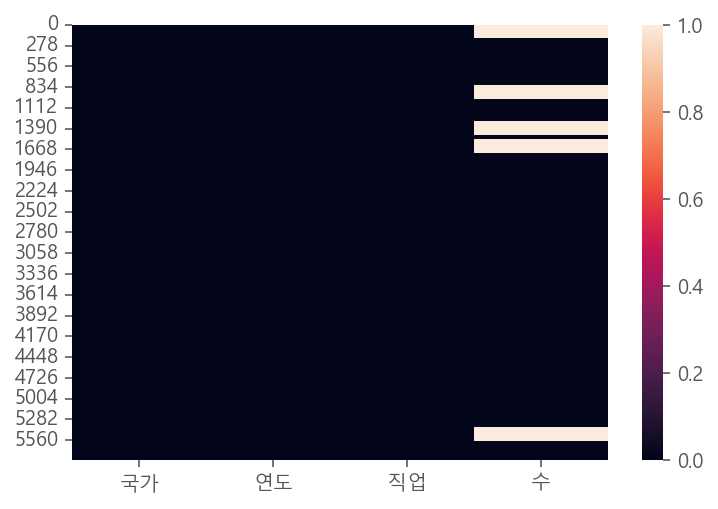

In [62]:
_ = sns.heatmap(data=df_Nmw.isnull())

##### 중복값

In [86]:
df_Nmw.duplicated().sum()

0

##### 필요없는 데이터 버리기
직업에서 천명당 의사/약사/치과의사 등은 필요없기때문에, 해당 행은 버려줍니다.

In [76]:
df_Nmw = df_Nmw[~df_Nmw["직업"].str.contains("천명당")].copy()
df_Nmw.shape

(2910, 4)

사용하는 데이터에서 다음과 같은 국가들만 공통으로 들어있기 때문에,  
모든 데이터를 합쳐 분석하기 위해 공통 국가들만 있는 데이터를 새롭게 생성합니다.

In [82]:
df_Nmw_inter = df_Nmw[df_Nmw["국가"].isin(country_intersection)]
df_Nmw_inter.shape

(1829, 4)

#### EDA 및 시각화
#### 1. 기존 데이터셋 (df_Nmw)

##### 기초 기술 통계

#### 2. 공통 국가 데이터 셋 (df_Nmw_inter)

#### 기초 기술 통계

### 3. 보건 관련/서비스 지출

### 4. 의약품 판매/소비

### 5. 공공 사회 복지 지출

## 5. 종합